In [1]:
from PIL import ImageGrab
import psutil
import os
import time
import threading
import cv2
import numpy as np
import keyboard
import pygetwindow as gw
import mss
import ctypes
import matplotlib.pyplot as plt
import pyautogui
from pynput.keyboard import Key, Controller
import pandas as pd

In [2]:
def get_process_id_by_name(process_name):
    for process in psutil.process_iter(['pid', 'name']):
        if process.info['name'] == process_name:
            return process.info['pid']
    return None

def get_active_window_process_id():
    active_window = ctypes.windll.user32.GetForegroundWindow()
    process_id = ctypes.c_ulong(0)
    ctypes.windll.user32.GetWindowThreadProcessId(active_window, ctypes.byref(process_id))
    return process_id.value

In [26]:
# import time module, Observer, FileSystemEventHandler
import time
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler
import json


class OnMyWatch:

	def __init__(self, watchDirectory):
		self.watchDirectory = watchDirectory
		self.observer = Observer()

	def run(self):
		event_handler = Handler()
		self.observer.schedule(event_handler, self.watchDirectory, recursive = True)
		self.observer.start()
		try:
			while True:
				time.sleep(5)
		except:
			self.observer.stop()
			print("Observer Stopped")

		self.observer.join()

def load_json_file(json_path):
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)
        return data

process_name = "Trackmania.exe"  # Назва процесу, для якого ви хочете отримати ідентифікатор
process_id = get_process_id_by_name(process_name)

coords_array = []

print(process_id)
index = 1

class Handler(FileSystemEventHandler):

	@staticmethod
	def on_any_event(event):
		if event.is_directory:
			return None

		elif event.event_type == 'modified':
			# Event is modified, you can process it now
			# print("Watchdog received modified event - % s." % event.src_path)
			json_data = load_json_file(event.src_path)
			

			printscreen_array = []

			active_process_id = get_active_window_process_id()  

			if process_id == active_process_id:
				global index
				global df
				global coords_array
				# print("screenshot")

				coord_data = {"x": json_data['carPositionRight'], "y": json_data['carPositionLeft']}
				print(coord_data)
				coords_array.append(coord_data)
			

if __name__ == '__main__':
	watchDirectory = "E:\\study\\bachelor\\temp-files\\stored txt angelscript files\\"
	watch = OnMyWatch(watchDirectory)
	watch.run()


15440
Observer Stopped


In [20]:
len(coords_array)

1035

In [21]:
for coord_index in range(len(coords_array) - 1):
    distance = pow(pow(coords_array[coord_index]['x'] - coords_array[coord_index + 1]['x'], 2) + pow(coords_array[coord_index]['y'] - coords_array[coord_index + 1]['y'], 2), 1 / 2.)
    print(distance)

0.0
6.103515625e-05
6.103515625e-05
0.0
0.0
0.0
6.103515625e-05
0.0
6.103515625e-05
0.0
0.0
0.0
6.103515625e-05
0.0
6.103515625e-05
0.0
0.0
0.0
6.103515625e-05
0.0
6.103515625e-05
0.0
0.0
6.103515625e-05
6.103515625e-05
0.0
6.103515625e-05
0.0
6.103515625e-05
0.0
0.0
0.0
6.103515625e-05
0.0
0.00013647875839232116
0.0
0.00311279296875
0.0
0.00860595703125
0.0
0.0120849609375
0.0
0.0167236328125
0.0
0.02215576171875
0.0
0.02490234375
0.0
0.03131103515625
0.0
0.0347900390625
0.0377197265625
0.044921875
0.0
0.04840087890625
0.0
0.05047607421875
0.0
0.0574951171875
0.06195068359375
0.0
0.0633544921875
0.0
0.0711669921875
0.0
0.07550048828125
0.0
0.07513427734375
0.0
0.0838623046875
0.0
0.08905029296875
0.0
0.093505859375
0.0
0.0919189453125
0.0
0.1025390625
0.0
0.1007080078125
0.0
0.111083984375
0.0
0.11572265625
0.0
0.11297607421875
0.0
0.12469482421875
0.0
0.12933349609375
0.0
0.125732421875
0.0
0.1383056640625
0.0
0.1429443359375
0.0
0.14739990234375
0.0
0.14312744140625
0.0
0.1564941406

In [22]:
def filter_coords(coords_array):
    removed_coords = []

    for coord_index in range(len(coords_array) - 1):
        if coords_array[coord_index] == coords_array[coord_index + 1]:
            coord_index += 1
        else:
            removed_coords.append(coords_array[coord_index])

    coords_array = removed_coords.copy()
    
    first_index = 0
    second_index = 1

    filtered_array = [coords_array[first_index]]

    while True:
        if second_index == len(coords_array):
            break

        if pow(pow(coords_array[first_index]['x'] - coords_array[second_index]['x'], 2) + pow(coords_array[first_index]['y'] - coords_array[second_index]['y'], 2), 1 / 2.) < 100:
            filtered_array.append(coords_array[second_index])
            first_index += 1
        second_index += 1

    return filtered_array

filtered_array = filter_coords(coords_array)

In [23]:
len(filtered_array)

521

In [24]:
filtered_array

[{'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688},
 {'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688.0001220703125},
 {'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688},
 {'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688.0001220703125},
 {'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688},
 {'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688.0001220703125},
 {'x': 592, 'y': 688.0000610351562},
 {'x': 592, 'y': 688},
 {'x': 592.0001220703125, 'y': 688.0000610351562},
 {'x': 592.0032348632812, 'y': 688.0000610351562},
 {'x': 592.0118408203125, 'y': 688.0000610351562},
 {'x': 592.02392578125, 'y': 688.0000610351562},
 {'x': 592.0406494140625, 'y': 688.0000610351562},
 {'x': 592.0628051757812, 'y': 688.0000610351562},
 {'x': 592.0877075195312, 'y': 688.0000610351562},
 {'x': 592.1190185546875, 'y': 688.0000610351562},
 {'x': 592.15380859375, 'y': 688.0000610351562},
 {'x': 592.1915283203125, 'y': 688.0000610351562},
 {'x': 592.2364501953125, 'y': 6

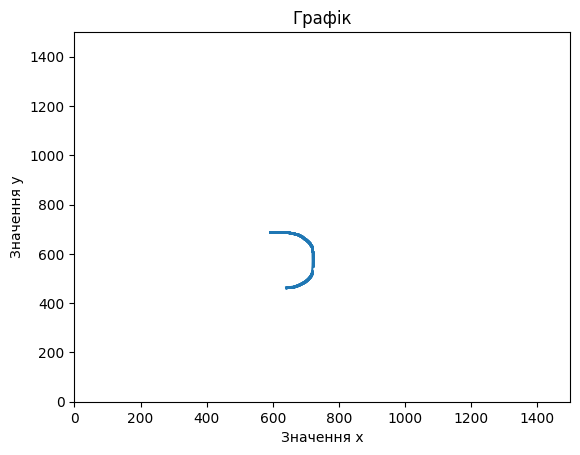

In [25]:
x_values = [item["x"] for item in filtered_array]
y_values = [item["y"] for item in filtered_array]

plt.plot(x_values, y_values, marker='o', linestyle='-', markersize=1)
plt.title('Графік')
plt.xlabel('Значення x')
plt.ylabel('Значення y')
plt.xlim(0, 1500)  # Межі для вісі x
plt.ylim(0, 1500)  # Межі для вісі y
plt.grid(False)
plt.show()